<a href="https://colab.research.google.com/github/vjmiyagi/DS-Unit-1-Sprint-2-Statistics/blob/master/module1/LS_DSPT6_121_Statistics_Probability_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

## *Data Science Unit 1 Sprint 2 Assignment 1*

# Apply the t-test to real data

Your assignment is to determine which issues have "statistically significant" differences between political parties in this [1980s congressional voting data](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records). The data consists of 435 instances (one for each congressperson), a class (democrat or republican), and 16 binary attributes (yes or no for voting for or against certain issues). Be aware - there are missing values!

Your goals:

1. Load and clean the data (or determine the best method to drop observations when running tests)
2. Using hypothesis testing, find an issue that democrats support more than republicans with p < 0.01
3. Using hypothesis testing, find an issue that republicans support more than democrats with p < 0.01
4. Using hypothesis testing, find an issue where the difference between republicans and democrats has p > 0.1 (i.e. there may not be much of a difference)

Note that this data will involve *2 sample* t-tests, because you're comparing averages across two groups (republicans and democrats) rather than a single group against a null hypothesis.

In [1]:
### YOUR CODE STARTS HERE

# imports
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from matplotlib import rc

# Get the data

# wget
! wget https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data --no-check-certificate

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


--2020-04-09 02:11:58--  https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
  Issued certificate has expired.
HTTP request sent, awaiting response... 200 OK
Length: 18171 (18K) [application/x-httpd-php]
Saving to: ‘house-votes-84.data’

house-votes-84.data 100%[===================>]  17.75K  --.-KB/s    in 0.03s   

2020-04-09 02:11:58 (634 KB/s) - ‘house-votes-84.data’ saved [18171/18171]



In [2]:
# Make DataFrame
cols = ['party','handicapped-infants','water-project',
                          'budget','physician-fee-freeze', 'el-salvador-aid',
                          'religious-groups','anti-satellite-ban',
                          'aid-to-contras','mx-missile','immigration',
                          'synfuels', 'education', 'right-to-sue','crime','duty-free',
                          'south-africa']
house = pd.read_csv('house-votes-84.data',header=None,
                    names=cols,
                    na_values='?')
house

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,NaN,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,NaN
2,democrat,NaN,y,y,NaN,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,NaN,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,NaN,y,y,y,y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,republican,n,n,y,y,y,y,n,n,y,y,n,y,y,y,n,y
431,democrat,n,n,y,n,n,n,y,y,y,y,n,n,n,n,n,y
432,republican,n,NaN,n,y,y,y,n,n,n,n,y,y,y,y,n,y
433,republican,n,n,n,y,y,y,NaN,NaN,NaN,NaN,n,y,y,y,n,y


In [3]:
# Replace n and y with 0 and 1
house = house.replace({'y':1, 'n':0})
house.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


In [4]:
# Make two dataframes, one republican, one democrat

dem = house[house['party']=='democrat']
print('dem',dem.shape)
rep = house[house['party']=='republican']
print('rep', rep.shape)

dem (267, 17)
rep (168, 17)


In [5]:
# Create a dataset that tallies vote count with ttest results

cols = ['bill', 'total', 'rep', 'dem','tstat','pvalue']

votes = []
bills = ['handicapped-infants','water-project','budget',
        'physician-fee-freeze','el-salvador-aid','religious-groups',
        'anti-satellite-ban','aid-to-contras','mx-missile','immigration',
        'synfuels','education','right-to-sue','crime','duty-free',
        'south-africa']

for x in bills:
    r = int(rep[x].sum())
    d = int(dem[x].sum())
    s = ttest_ind(rep[x], dem[x], nan_policy='omit')

    votes.append([x,r+d,r,d,s[0],s[1]])

pd.set_option('display.float_format', lambda x: '%.5f' % x)
votes = pd.DataFrame(votes, columns=cols)

votes.head(16)

,bill,total,rep,dem,tstat,pvalue
0,handicapped-infants,187,31,156,-9.20526,0.00000
1,water-project,195,75,120,0.08897,0.92916
2,budget,253,22,231,-23.21278,0.00000
3,physician-fee-freeze,177,163,14,49.36708,0.00000
4,el-salvador-aid,212,157,55,21.13669,0.00000
5,religious-groups,272,149,123,9.73758,0.00000
6,anti-satellite-ban,239,39,200,-12.52619,0.00000
7,aid-to-contras,242,24,218,-18.05209,0.00000
8,mx-missile,207,19,188,-16.43750,0.00000
9,immigration,216,92,124,1.73591,0.08330


# Using hypothesis testing, find an issue that democrats support more than republicans with p < 0.01

In [6]:
demsup = votes[(votes['pvalue'] <= 0.01) & (votes['dem'] > votes['rep'])]

demsup

,bill,total,rep,dem,tstat,pvalue
0,handicapped-infants,187,31,156,-9.20526,0.00000
2,budget,253,22,231,-23.21278,0.00000
6,anti-satellite-ban,239,39,200,-12.52619,0.00000
7,aid-to-contras,242,24,218,-18.05209,0.00000
8,mx-missile,207,19,188,-16.43750,0.00000
10,synfuels,150,21,129,-8.29360,0.00000
14,duty-free,174,14,160,-12.85315,0.00000
15,south-africa,269,96,173,-6.84945,0.00000


In [0]:
import matplotlib.pyplot as plt


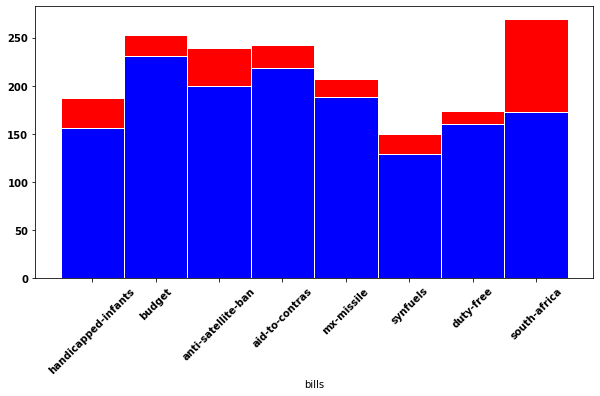

In [24]:
# set figure size
f, ax = plt.subplots(figsize=(10,5))
 
# y-axis in bold
rc('font', weight='bold')
 
# Values of each group

bars1 = demsup['dem']
bars2 = demsup['rep']
 
# Heights of bars1 + bars2
bars = np.add(bars1, bars2).tolist()
 
# The position of the bars on the x-axis
r = [0,1,2,3,4,5,6,7]
 
# Names of group and bar width
# df.values.tolist()
names = demsup['bill'].tolist()
barWidth = 1
 

# Create democrat bar
plt.bar(r, bars1, color='b', edgecolor='white', width=barWidth)
# Create republican bar
plt.bar(r, bars2, bottom=bars1, color='r', edgecolor='white', width=barWidth)
 
# Custom X axis
plt.xticks(r, names, fontweight='bold', rotation=45)

plt.xlabel("bills")

 
# Show graphic
plt.show()


TO AMEND H.R. 6023, A BILL AMENDING THE TRADE ACT OF 1974 TO RENEW THE AUTHORITY FOR THE OPERATION OF THE GENERALIZED SYSTEM OF PREFERENCES. THE GEPHARDT AMENDMENT REMOVES TAIWAN, HONG KONG, AND SOUTH KOREA FROM THE LIST OF COUNTRIES ELIGIBLE FOR DUTY-FREE TREATMENT UNDER THE GENERAL SYSTEM OF PREFERENCES. (MOTION FAILED).



14.0


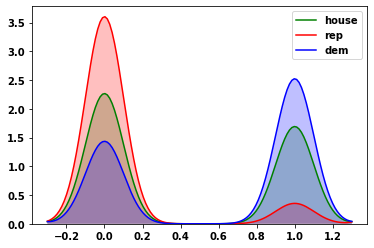

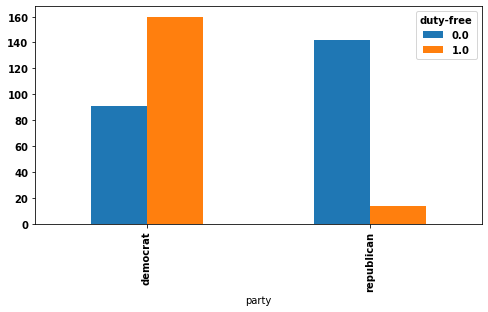

In [9]:
# Taking a closer look at the vote on duty-free
# Graph entire house vote


sns.kdeplot(house['duty-free'],label='house', 
            bw='.1', shade=True,color='g');

#Graph republican votes
sns.kdeplot(house[house['party']=='republican']['duty-free'],
            bw='.1', shade=True,
            label='rep',color='r');

# Graph democrat votes
sns.kdeplot(house[house['party']=='democrat']['duty-free'],
            bw='.1', shade=True,
            label='dem', color = 'b');

print(house[house['party']=='republican']['duty-free'].sum())

# Create crosstab and bar chart

df = pd.crosstab(house['party'],house['duty-free'])
df.plot(kind='bar',figsize=(8,4));

# Using hypothesis testing, find an issue that republicans support more than democrats with p < 0.01

In [10]:
repsup = votes[(votes['pvalue'] <= 0.01) & (votes['rep'] > votes['dem'])]

repsup

,bill,total,rep,dem,tstat,pvalue
3,physician-fee-freeze,177,163,14,49.36708,0.00000
4,el-salvador-aid,212,157,55,21.13669,0.00000
5,religious-groups,272,149,123,9.73758,0.00000
11,education,171,135,36,20.50069,0.00000
12,right-to-sue,209,136,73,13.51064,0.00000
13,crime,248,158,90,16.34209,0.00000


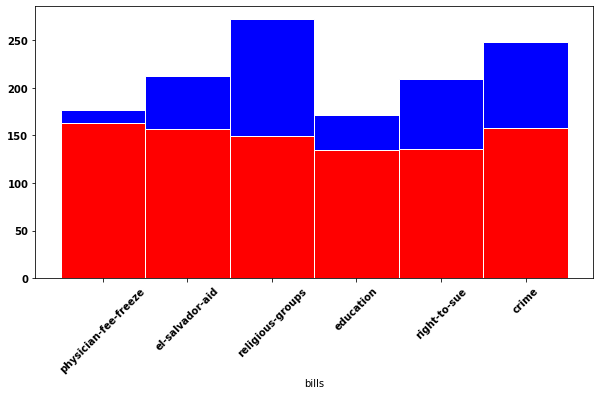

In [25]:
# set figure size
f, ax = plt.subplots(figsize=(10,5))
 
# y-axis in bold
rc('font', weight='bold')
 
# Values of each group

bars1 = repsup['rep']
bars2 = repsup['dem']
 
# Heights of bars1 + bars2
bars = np.add(bars1, bars2).tolist()
 
# The position of the bars on the x-axis
r = [0,1,2,3,4,5]
 
# Names of group and bar width
names = repsup['bill']
barWidth = 1
 

# Create democrat bar
plt.bar(r, bars1, color='r', edgecolor='white', width=barWidth)
# Create republican bar
plt.bar(r, bars2, bottom=bars1, color='b', edgecolor='white', width=barWidth)
 
# Custom X axis
plt.xticks(r, names, fontweight='bold', rotation=45)
plt.xlabel("bills")

 
# Show graphic
plt.show()


TO RECOMMIT H.R. 5394 TO THE COMMITTEE ON WAYS AND MEANS WITH INSTRUCTIONS TO REPORT IT BACK FORTHWITH CONTAINING AN AMENDMENT IN THE NATURE OF A SUBSTITUTE THAT WOULD PLACE A FREEZE ON PHYSICIANS' FEES FOR INPATIENT AND OUTPATIENT MEDICARE SERVICES FOR ONE YEAR, AND WOULD DELAY THE IMPLEMENTATION OF SPENDING INCREASES PROVIDED IN THIS BILL. (MOTION FAILED).

The data from the csv does not match the congressional record.

![alt text](https://raw.githubusercontent.com/vjmiyagi/vjmiyagi.github.io/master/img/physicianfreeze.png)

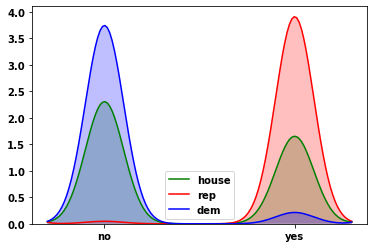

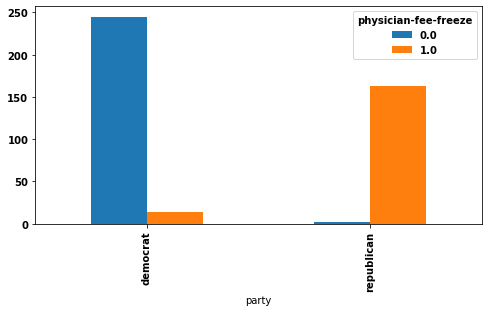

In [21]:
# Taking a closer look at the vote on physician-fee-freeze
# Graph entire house vote

fig, ax = plt.subplots()
sns.kdeplot(house['physician-fee-freeze'],label='house', 
            bw='.1', shade=True,color='g', ax=ax);

#Graph republican votes
sns.kdeplot(house[house['party']=='republican']['physician-fee-freeze'],
            bw='.1', shade=True,
            label='rep',color='r', ax=ax);

# Graph democrat votes
sns.kdeplot(house[house['party']=='democrat']['physician-fee-freeze'],
            bw='.1', shade=True,
            label='dem', color = 'b', ax=ax);

plt.xticks([0,1], ['no', 'yes'] );
plt.show()

# Create crosstab and bar chart

df = pd.crosstab(house['party'],house['physician-fee-freeze'])
df.plot(kind='bar',figsize=(8,4));

# Using hypothesis testing, find an issue where the difference between republicans and democrats has p > 0.1

In [13]:
nodif = votes[(votes['pvalue'] > 0.1)]

nodif

,bill,total,rep,dem,tstat,pvalue
1,water-project,195,75,120,0.08897,0.92916


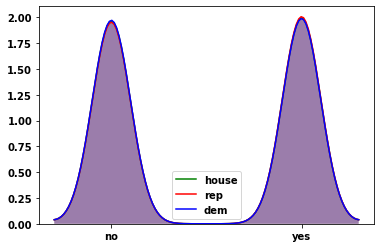

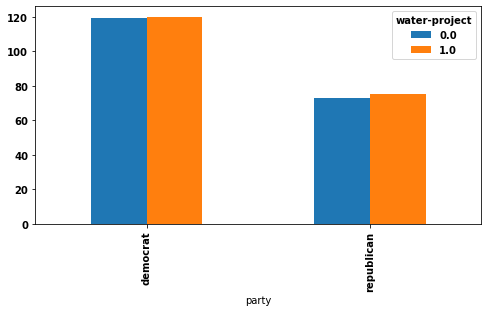

In [29]:
# Taking a closer look at the vote on water-project
# Graph entire house vote

fig, ax = plt.subplots()
sns.kdeplot(house['water-project'],label='house',
            bw='.1', shade=True,color='g', ax=ax);

#Graph republican votes
sns.kdeplot(house[house['party']=='republican']['water-project'],
            bw='.1', shade=True,
            label='rep',color='r', ax=ax);

# Graph democrat votes
sns.kdeplot(house[house['party']=='democrat']['water-project'],
            bw='.1', shade=True,
            label='dem', color = 'b', ax=ax);

plt.xticks([0,1], ['no', 'yes'] );
plt.show()

# Create crosstab and bar chart

df = pd.crosstab(house['party'],house['water-project'])
df.plot(kind='bar',figsize=(8,4));

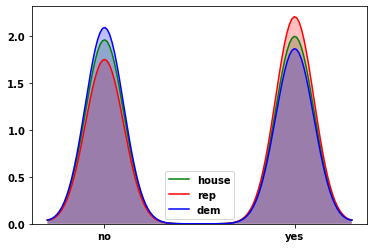

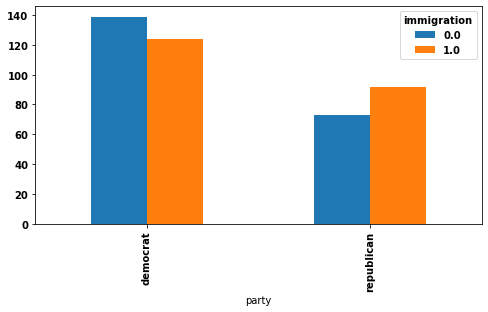

In [30]:
# Taking a closer look at the vote on immigration
# Because it was the odd duck out
# Graph entire house vote

fig, ax = plt.subplots()
sns.kdeplot(house['immigration'],label='house', 
            bw='.1', shade=True,color='g', ax=ax);

#Graph republican votes
sns.kdeplot(house[house['party']=='republican']['immigration'],
            bw='.1', shade=True,
            label='rep',color='r', ax=ax);

# Graph democrat votes
sns.kdeplot(house[house['party']=='democrat']['immigration'],
            bw='.1', shade=True,
            label='dem', color = 'b', ax=ax);

plt.xticks([0,1], ['no', 'yes'] );
plt.show()

# Create crosstab and bar chart

df = pd.crosstab(house['party'],house['immigration'])
df.plot(kind='bar',figsize=(8,4));

## Stretch Goals:

1. Refactor your code into functions so it's easy to rerun with arbitrary variables
2. Work on Performing a T-test without using Scipy in order to get "under the hood" and learn more thoroughly about this topic.
### Start with a 1-sample t-test
 - Establish the conditions for your test 
 - [Calculate the T Statistic](https://blog.minitab.com/hs-fs/hubfs/Imported_Blog_Media/701f9c0efa98a38fb397f3c3ec459b66.png?width=247&height=172&name=701f9c0efa98a38fb397f3c3ec459b66.png) (You'll need to omit NaN values from your sample).
 - Translate that t-statistic into a P-value. You can use a [table](https://www.google.com/search?q=t+statistic+table) or the [University of Iowa Applet](https://homepage.divms.uiowa.edu/~mbognar/applets/t.html)

 ### Then try a 2-sample t-test
 - Establish the conditions for your test 
 - [Calculate the T Statistic](https://lh3.googleusercontent.com/proxy/rJJ5ZOL9ZDvKOOeBihXoZDgfk7uv1YsRzSQ1Tc10RX-r2HrRpRLVqlE9CWX23csYQXcTniFwlBg3H-qR8MKJPBGnjwndqlhDX3JxoDE5Yg) (You'll need to omit NaN values from your sample).
 - Translate that t-statistic into a P-value. You can use a [table](https://www.google.com/search?q=t+statistic+table) or the [University of Iowa Applet](https://homepage.divms.uiowa.edu/~mbognar/applets/t.html)

 ### Then check your Answers using Scipy!